# PRÁCTICA 0 - ADRIÁN TURIEL CHARRO - VÍCTOR CHOZA MERINO

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Funcion auxiliar 
def cuadrado(x):
    return x*x

In [3]:
def integra_mc(fun, a, b, num_puntos=10000):      
    
    eje_x = np.linspace(a, b, num_puntos)
    # les aplico la funcion
    eje_y=fun(eje_x)                             
    # busco el max elemento tras aplicar la funcion
    M = max(eje_y)                               
               

    x_rand = np.random.uniform(a,b,int(num_puntos))   # x ϵ [a,b]
    y_rand = np.random.uniform(0,M,int(num_puntos))   # y ϵ [0,M]
    f_x_rand = fun(x_rand)                     
    
    # Forma rápida de calcular la integral aproximada
    # para calcular el tiempo
    tic = time.process_time()                        
    
    nDebajo = np.sum(y_rand < f_x_rand)
    I1 = (nDebajo/num_puntos) * (b - a) * M     
    
    toc = time.process_time()
    t1 =1000* (toc - tic)
    print('Tiempo rapido:', t1 ,' ms')
    print('Integral = ',I1, '\n')
    
    # Forma lenta de calcular la integral aproximada
    tic = time.process_time()
    nDebajo = 0
    for i in range(len(x_rand)):
        if fun(x_rand[i]) >= y_rand[i]:
            nDebajo += 1
    I2 = (nDebajo/num_puntos) * (b - a) * M     
    
    toc = time.process_time()
    t2 =1000* (toc - tic)
    print('Tiempo lento:', t2 ,' ms')
    print('Integral = ',I2)
    
    #Dibujamos la gráfica
    # plot une los puntos, pinto la funcion
    plt.plot(eje_x, eje_y, linewidth=2.5)     
    # scatter no une los puntos, pinto los puntos aleatorios
    plt.scatter(x_rand,y_rand, color = 'red', alpha = .5)  
    plt.show
    
    return t1,t2

Tiempo rapido: 0.0  ms
Integral =  41.75 

Tiempo lento: 15.625  ms
Integral =  41.75


(0.0, 15.625)

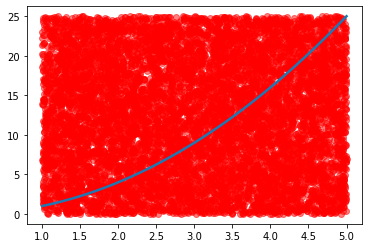

In [4]:
integra_mc(cuadrado, 1, 5, 10000)

## COMPARACIÓN

In [10]:
#Funcion que devuelve la integral y el posible margen de error
import scipy.integrate as integrate
integrate.quad(cuadrado, 1, 5)      # funcion, limite inferior, limite superior

(41.33333333333333, 4.588921835117313e-13)

In [34]:
# COMPARACION DE TIEMPOS (para ejecutar esto mejor quitar los print de la funcion de arriba y lo de pintar la grafica)

def compara_tiempos(fun):
    sizes = np.linspace(100,1000,20)
    times_it = []
    times_arr = []
    for size in sizes:
            x1 = np.random.randint(1,100)
            x2 = np.random.randint(1,100)
                                    
            t1,t2 = integra_mc(fun,min(x1,x2),max(x1,x2),1000)            
            times_it += [t2]
            times_arr += [t1]
            
    #print(times_arr) 
    #print(times_it)
    plt.figure()
    plt.scatter(sizes, times_it, label='iterativo')
    plt.scatter(sizes, times_arr, label='vector numpy')
    plt.legend()     # parar mostrar la leyenda

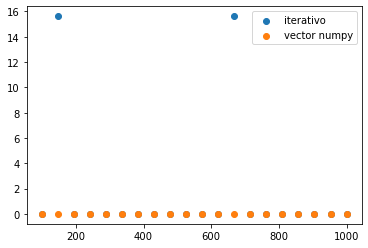

In [35]:
compara_tiempos(cuadrado)